In [2]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('../data/historical_neos.csv')

In [5]:
# Preview
print("Shape:", df.shape)
display(df.head())


Shape: (38252, 14)


,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h,diameter,diameter_sigma,fullname
0,509352,57,2.415024e+06,1900-Jan-04 22:25,0.009632,0.009625,0.009639,8.686711,8.654807,00:02,20.16,NaN,NaN,509352 (2007 AG)
1,2014 SC324,57,2.415031e+06,1900-Jan-11 01:07,0.039964,0.039904,0.040025,10.652382,10.646122,00:18,24.39,NaN,NaN,(2014 SC324)
2,2012 UK171,54,2.415032e+06,1900-Jan-12 23:02,0.049706,0.049578,0.049834,7.153496,7.145999,00:05,24.46,NaN,NaN,(2012 UK171)
3,2024 BA5,3,2.415045e+06,1900-Jan-25 06:22,0.026434,0.011310,0.198644,8.436204,8.424247,21:33,26.02,NaN,NaN,(2024 BA5)
4,2024 BW1,6,2.415045e+06,1900-Jan-25 19:29,0.037979,0.010125,0.089436,6.339787,6.328711,4_11:16,25.12,NaN,NaN,(2024 BW1)


In [6]:
# Column names
print("Columns:\n", df.columns.tolist())

Columns:
 ['des', 'orbit_id', 'jd', 'cd', 'dist', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 't_sigma_f', 'h', 'diameter', 'diameter_sigma', 'fullname']


In [7]:
# Summary
display(df.describe(include='all'))
display(df.info())

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h,diameter,diameter_sigma,fullname
count,38252,38252,3.825200e+04,38252,38252.000000,38252.000000,38252.000000,38252.000000,38230.000000,38252,38243.000000,1029.000000,917.000000,38252
unique,17398,236,NaN,38227,NaN,NaN,NaN,NaN,NaN,7550,NaN,NaN,NaN,17398
top,2010 VQ,3,NaN,2024-Sep-30 03:05,NaN,NaN,NaN,NaN,NaN,< 00:01,NaN,NaN,NaN,(2010 VQ)
freq,38,3299,NaN,2,NaN,NaN,NaN,NaN,NaN,16004,NaN,NaN,NaN,38
mean,NaN,NaN,2.455257e+06,NaN,0.026712,0.023002,0.043530,10.194380,10.166096,NaN,25.328701,0.495408,0.060718,NaN
std,NaN,NaN,1.618207e+04,NaN,0.014128,0.014246,0.044247,5.241834,5.250095,NaN,2.484913,0.718718,0.118220,NaN
min,NaN,NaN,2.415024e+06,NaN,0.000045,0.000000,0.000045,0.073451,0.125474,NaN,14.080000,0.002500,0.000000,NaN
25%,NaN,NaN,2.446797e+06,NaN,0.014892,0.010574,0.018236,6.495804,6.459894,NaN,24.100000,0.128000,0.007000,NaN
50%,NaN,NaN,2.458495e+06,NaN,0.027498,0.022412,0.033865,9.222905,9.195629,NaN,25.680000,0.300000,0.022000,NaN
75%,NaN,NaN,2.460734e+06,NaN,0.038856,0.034919,0.047846,12.882953,12.863011,NaN,26.940000,0.548000,0.061000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38252 entries, 0 to 38251
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   des             38252 non-null  object 
 1   orbit_id        38252 non-null  object 
 2   jd              38252 non-null  float64
 3   cd              38252 non-null  object 
 4   dist            38252 non-null  float64
 5   dist_min        38252 non-null  float64
 6   dist_max        38252 non-null  float64
 7   v_rel           38252 non-null  float64
 8   v_inf           38230 non-null  float64
 9   t_sigma_f       38252 non-null  object 
 10  h               38243 non-null  float64
 11  diameter        1029 non-null   float64
 12  diameter_sigma  917 non-null    float64
 13  fullname        38252 non-null  object 
dtypes: float64(9), object(5)
memory usage: 4.1+ MB


None

In [8]:
# Check missing values
missing = df.isna().sum()
print("Missing Values:\n", missing)

Missing Values:
 des                   0
orbit_id              0
jd                    0
cd                    0
dist                  0
dist_min              0
dist_max              0
v_rel                 0
v_inf                22
t_sigma_f             0
h                     9
diameter          37223
diameter_sigma    37335
fullname              0
dtype: int64


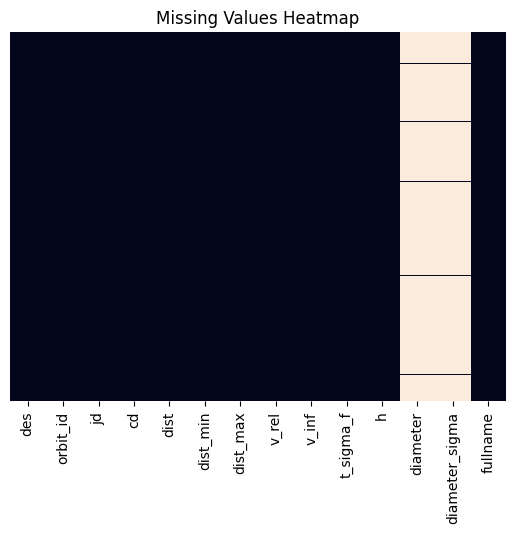

In [9]:
# Optional: visualize missing
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
# Check distinct values in 'dist', 'v_rel', 'diameter', 'h'
for col in ['dist', 'v_rel', 'diameter', 'h']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert strings to float
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, missing={df[col].isna().sum()}")


dist: min=4.50910597356063e-05, max=0.0499995825093675, missing=0
v_rel: min=0.0734505578690846, max=42.9188507680773, missing=0
diameter: min=0.0025, max=7.0, missing=37223
h: min=14.08, max=33.2, missing=9
